## Table of Content

- Hypothesis Testing

- EDA

- Data Cleaning

- Feature Selection and Scaling

- Model Building

- Final Submission

### Problem Statement

https://datahack.analyticsvidhya.com/contest/janatahack-cross-sell-prediction/True/#ProblemStatement


### Hypothesis Testing

Hypothesis Testing is the first step we take towards understanding the data. Hypothesis Testing gives us the head-start towards understanding the problem.

- Gender: Males are more likely to buy the Insurance.

- Age: It is generally said that it is profitable to buy Insurance as early as possible so more likely  btw 25-40 age.

- Driving_License: Customers who generally have Driving_License take Insurance.

- Previously_Insured: Customers generally take One Vehicle insurance.

- Vehicle_Age: The more the vehicle_age the better.

- Annual_Premium: Customers generally opt for Insurance where  Premium is not too high.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [77]:
train_org=pd.read_csv('train.csv')
test_org=pd.read_csv('test.csv')

train=train_org.copy()
test=test_org.copy()

In [78]:
print('Shape of train data: ',train.shape)
print('Shape of test data: ',test.shape)

Shape of train data:  (381109, 12)
Shape of test data:  (127037, 11)


In [79]:
train_org.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [80]:
test_org.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [81]:
train['source']='train'
test['source']='test'

data=pd.concat([train,test],ignore_index=True)

In [82]:
data.shape

(508146, 13)

In [83]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1.0,train
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0.0,train
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1.0,train
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0.0,train
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0.0,train


### EDA

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 508146 entries, 0 to 508145
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    508146 non-null  int64  
 1   Gender                508146 non-null  object 
 2   Age                   508146 non-null  int64  
 3   Driving_License       508146 non-null  int64  
 4   Region_Code           508146 non-null  float64
 5   Previously_Insured    508146 non-null  int64  
 6   Vehicle_Age           508146 non-null  object 
 7   Vehicle_Damage        508146 non-null  object 
 8   Annual_Premium        508146 non-null  float64
 9   Policy_Sales_Channel  508146 non-null  float64
 10  Vintage               508146 non-null  int64  
 11  Response              381109 non-null  float64
 12  source                508146 non-null  object 
dtypes: float64(4), int64(5), object(4)
memory usage: 50.4+ MB


In [10]:
data.isnull().sum() ## Check for missing values.

id                           0
Gender                       0
Age                          0
Driving_License              0
Region_Code                  0
Previously_Insured           0
Vehicle_Age                  0
Vehicle_Damage               0
Annual_Premium               0
Policy_Sales_Channel         0
Vintage                      0
Response                127037
source                       0
dtype: int64

##### Numerical Features Analysis

In [11]:
num_features=[]

for i in data.columns:
    if (data[i].dtype!='object'):
        num_features.append(i)
        
        
cat_features=[]

for i in data.columns:
    if (data[i].dtype=='object'):
        cat_features.append(i)

In [12]:
num_features,cat_features

(['id',
  'Age',
  'Driving_License',
  'Region_Code',
  'Previously_Insured',
  'Annual_Premium',
  'Policy_Sales_Channel',
  'Vintage',
  'Response'],
 ['Gender', 'Vehicle_Age', 'Vehicle_Damage', 'source'])

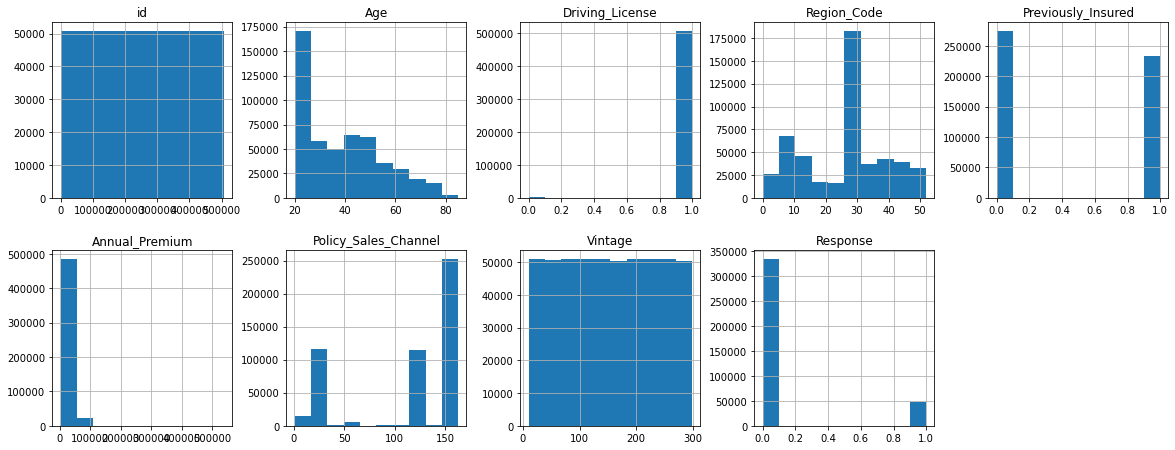

In [13]:
data.hist(figsize=(20,20),layout=(5,5))
plt.savefig('Wholedata.png')
plt.show()

From the above plot we can see that :

- Age column is **Right-Skewed**

- Diriving_license column has unbalanced ratio between the categories.

In [33]:
data['Driving_License'].value_counts()/len(data)

1    0.997936
0    0.002064
Name: Driving_License, dtype: float64

We can see the unequal distribution in Driving_License. So we shall drop this column.

In [84]:
data.drop('Driving_License',axis=1,inplace=True)

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


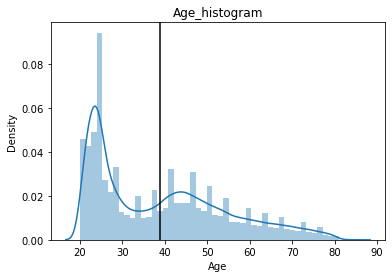

In [21]:
sns.distplot(data['Age'])
plt.axvline(data['Age'].mean(),color='k')
plt.title('Age_histogram')
plt.savefig('EDA_1.png')
plt.show()

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(data['Annual_Premium'])
# plt.axvline(data['Annual_Premium'].mean(),color='k')
# plt.xlim(0,100000)

plt.show()

We can see that customers generally opt for Premium which is not too high.

In [ ]:
# data.groupby('Age')['Annual_Premium'].mean()

In [ ]:
###### check for skweness in this colum.

##### Categorical Features Analysis.

In [ ]:
cat_features

In [19]:
data.groupby('Gender')['Response'].mean()

Gender
Female    0.103902
Male      0.138411
Name: Response, dtype: float64

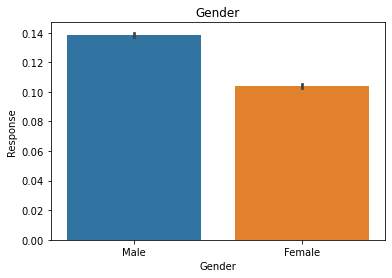

In [22]:
sns.barplot(x='Gender',y='Response',data=data)
plt.title('Gender')
plt.savefig('EDA_2.png')

plt.show()

We can see that 'Males' are more likely to buy insurance.

In [ ]:
data.groupby('Vehicle_Age')['Response'].mean()

In [ ]:
sns.barplot(x='Vehicle_Age',y='Response',data=data)

plt.show()

From the above figure it is clear that the more the age of vehicle the better making the vehicle insurance cheaper

https://www.symboinsurance.com/blogs/car-insurance/correlation-car-insurance-age-car/#:~:text=With%20age%2C%20the%20car%20depreciates,the%20premium%20and%20stay%20protected.&text=However%2C%20with%20time%20the%20car,overall%20value%20of%20the%20car.

In [ ]:
sns.barplot(x='Vehicle_Damage',y='Response',data=data)

plt.show()

In [ ]:
plt.figure(figsize=(40,10))
data['Policy_Sales_Channel'].value_counts().plot.bar()

- Policy_Sales_Channel no. 152 have higest number of customers.
- Policy_Sales_Channel no. [152,26,124,160,156,122,157,154,151,163] have most of the customers.

### Data Cleaning

In [ ]:
cat_features

In [85]:
gender_map={'Male':0,'Female':1}

data['Gender']=data['Gender'].map(gender_map)


vehicle_age_map={'1-2 Year':0,'< 1 Year':1,'> 2 Years':2}

data['Vehicle_Age']=data['Vehicle_Age'].map(vehicle_age_map)


Vehicle_Damage_map={'Yes':0,'No':1}

data['Vehicle_Damage']=data['Vehicle_Damage'].map(Vehicle_Damage_map)

In [86]:
data.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,1,0,44,28.0,0,2,0,40454.0,26.0,217,1.0,train
1,2,0,76,3.0,0,0,1,33536.0,26.0,183,0.0,train
2,3,0,47,28.0,0,2,0,38294.0,26.0,27,1.0,train
3,4,0,21,11.0,1,1,1,28619.0,152.0,203,0.0,train
4,5,1,29,41.0,1,1,1,27496.0,152.0,39,0.0,train


In [ ]:
# data=pd.get_dummies(data,columns=['Vehicle_Age'],drop_first=True)

In [37]:
corr_df=data.corr()

In [38]:
# corr_df[corr_df>0.8]

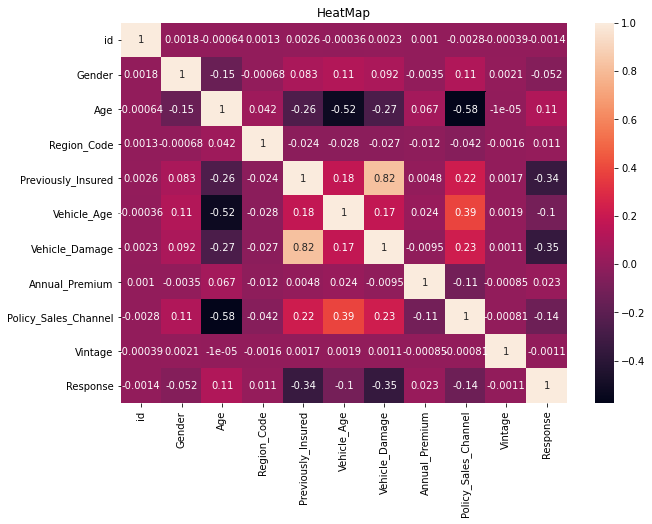

In [39]:
plt.figure(figsize=(10,7))
sns.heatmap(corr_df,annot=True)
plt.title('HeatMap')
plt.savefig('EDA_3.png')

plt.show()

plt.show()

We can see that Previously_insured & Vehicle_Damage are both Positively correlated.
We will delete column which has strong relation with the Target column.

This time we will delete column: **Vehicle_Damage** as it is more negatively correlated to  the Target class.

In [40]:
# data.drop('Vehicle_Damage',axis=1,inplace=True)

In [41]:
data.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source
0,1,0,44,28.0,0,2,40454.0,26.0,217,1.0,train
1,2,0,76,3.0,0,0,33536.0,26.0,183,0.0,train
2,3,0,47,28.0,0,2,38294.0,26.0,27,1.0,train
3,4,0,21,11.0,1,1,28619.0,152.0,203,0.0,train
4,5,1,29,41.0,1,1,27496.0,152.0,39,0.0,train


#### In this section we will try the Discretisation of continous column using Decision Tree.

- Discretisation is a process of converting the continous variable into discrete variable with the help of bins.

- In this section we will convert the continous variable('Age','Annual_Premium') into discrete variable .

- Steps to Follow:

   1. Spit the data into train_test and fit the Decision Tree(depth=1,2,3,4) using the X=continous variable ; y=Target
   
   2. The continous variable are then replaced by the predicted_probability.

In [87]:
X=data.loc[data['source']=='train',['Age','Annual_Premium','Response']]
y=data.loc[data['source']=='train',['Response']]

# test.drop(['Response'],axis=1,inplace=True) ## For Final Prediction

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30 ,random_state = 2)

In [88]:
# Age column

In [89]:
### Fit the Decision Tree
dtree=DecisionTreeClassifier(max_depth=2)
dtree.fit(x_train.Age.to_frame(),y_train)

DecisionTreeClassifier(max_depth=2)

In [90]:
## Calculate the probability
x_train['Age_tree']=dtree.predict_proba(x_train.Age.to_frame())[:,1]

C:\Users\Dishaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Note: The Probability is same for each observation within a single bin.

In [91]:
x_train.head()

,Age,Annual_Premium,Response,Age_tree
275905,33,41453.0,0.0,0.201034
195653,22,20089.0,0.0,0.036814
293289,52,42310.0,0.0,0.201034
6065,45,2630.0,0.0,0.201034
18646,25,35506.0,0.0,0.036814


In [92]:
## Checking the uniqe values.
x_train['Age_tree'].unique()

array([0.2010345 , 0.03681361, 0.08399201, 0.10398756])

<AxesSubplot:xlabel='Age_tree'>

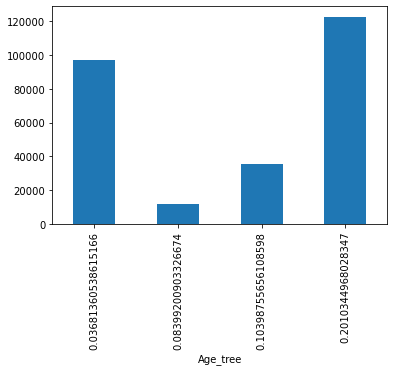

In [93]:
## checking the no of customer per bin
x_train.groupby('Age_tree')['Response'].count().plot.bar()

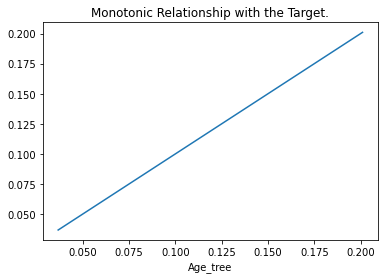

In [94]:
x_train.groupby('Age_tree')['Response'].mean().plot()
plt.title('Monotonic Relationship with the Target.')

plt.savefig('DC_1.png')

plt.show()

##### We can see that the new column: Age_tree is a good predictor of the Target.

We can use the Predicted_probability to create the **Bins**.

In [95]:
age_limit=pd.concat([x_train.groupby('Age_tree')['Age'].min(),x_train.groupby('Age_tree')['Age'].max()],axis=1)
age_limit

,Age,Age
Age_tree,,
0.036814,20,27
0.083992,28,29
0.103988,59,85
0.201034,30,58


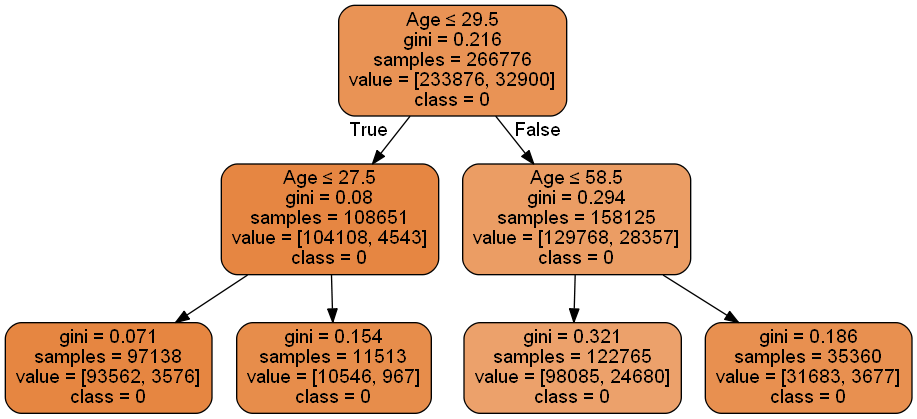

In [96]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=['Age'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Age_bin.png')
Image(graph.create_png())

##### Hyper-parameter Tuning to check the best depth.

In [97]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    
    scores = cross_val_score(tree_model, x_train.Age.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    
    score_ls.append(np.mean(scores))
    
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.653528     0.002830
1      2      0.683938     0.002064
2      3      0.689069     0.002108
3      4      0.695761     0.002520


##### We can see that with depth=2 is a better choice to avoid overfitting.

We replaced the continous colum with the bins.

In [98]:
data.loc[(data['Age']>=20) & (data['Age']<27),'Age_label']='Teenagers' ## Just starting out
data.loc[(data['Age']>=27) & (data['Age']<29),'Age_label']='Young' ## Young Ppl
data.loc[(data['Age']>=29) & (data['Age']<58),'Age_label']='Middle Age' ## Mid-Age Ppl
data.loc[(data['Age']>=58) & (data['Age']<=85),'Age_label']='Old Age' ## Old Age

data.loc[(data['Age']>=20) & (data['Age']<27),'Age']=0 ## Just starting out
data.loc[(data['Age']>=27) & (data['Age']<29),'Age']=1 ## Young Ppl
data.loc[(data['Age']>=29) & (data['Age']<58),'Age']=2 ## Mid-Age Ppl
data.loc[(data['Age']>=58) & (data['Age']<=85),'Age']=3 ## Old Age

In [99]:
data.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source,Age_label
0,1,0,2,28.0,0,2,0,40454.0,26.0,217,1.0,train,Middle Age
1,2,0,3,3.0,0,0,1,33536.0,26.0,183,0.0,train,Old Age
2,3,0,2,28.0,0,2,0,38294.0,26.0,27,1.0,train,Middle Age
3,4,0,0,11.0,1,1,1,28619.0,152.0,203,0.0,train,Teenagers
4,5,1,2,41.0,1,1,1,27496.0,152.0,39,0.0,train,Middle Age


C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


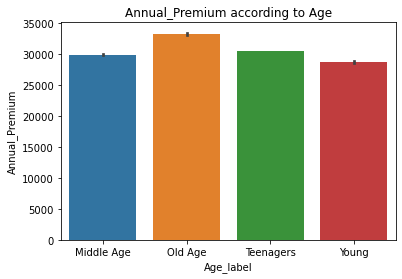

In [57]:
sns.barplot(data['Age_label'],data['Annual_Premium'])

plt.title('Annual_Premium according to Age')

plt.savefig('DC.png')


plt.show()

From the above Plot we can see that Annual_Premium is directly dependent on the Age of the Customer. The higher the age higher the Annual_Premium.

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


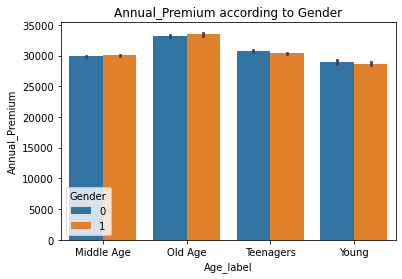

In [59]:
## 0:Male ; 1:Female
sns.barplot(data['Age_label'],data['Annual_Premium'],hue=data['Gender'])

plt.title('Annual_Premium according to Gender')

plt.savefig('DC_2.png')


plt.show()

There is not much to see from the above plot.

In [ ]:
sns.barplot(data['Age_label'],data['Annual_Premium'],hue=data['Response'])

We can see that:

- Age group 20-27 usually do not take Insurance as they are just starting with their lives and may not have money to pay the Premium.

- Age group from 29-85 opt for Insurance as they have driving License and resources to pay the Premium.

##### We shall do the same for Annual_Premium column as well.

In [100]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(x_train.Annual_Premium.to_frame(),y_train)

x_train['Annual_Premium_tree']=tree.predict_proba(x_train.Annual_Premium.to_frame())[:,1]


C:\Users\Dishaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [101]:
x_train['Annual_Premium_tree'].unique()

array([0.14019373, 0.10877935, 0.13156156, 0.15365861])

<AxesSubplot:xlabel='Annual_Premium_tree'>

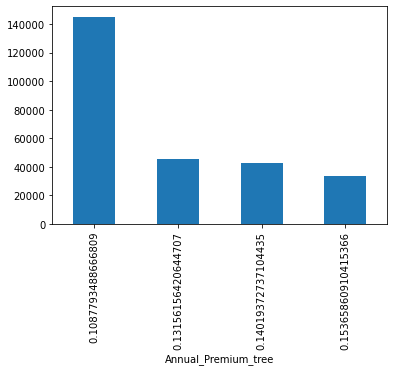

In [102]:
## checkthe no of customer per bin
x_train.groupby('Annual_Premium_tree')['Response'].count().plot.bar()

Text(0.5, 1.0, 'Monotonic Relationship with Target')

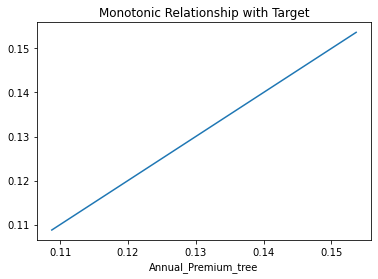

In [103]:
x_train.groupby('Annual_Premium_tree')['Response'].mean().plot()
plt.title('Monotonic Relationship with Target')

In [104]:
Annual_Premium_tree_limit=pd.concat([x_train.groupby('Annual_Premium_tree')['Annual_Premium'].min(),x_train.groupby('Annual_Premium_tree')['Annual_Premium'].max()],axis=1)
Annual_Premium_tree_limit

,Annual_Premium,Annual_Premium
Annual_Premium_tree,,
0.108779,10004.0,38085.0
0.131562,2630.0,9816.0
0.140194,38086.0,46170.0
0.153659,46171.0,540165.0


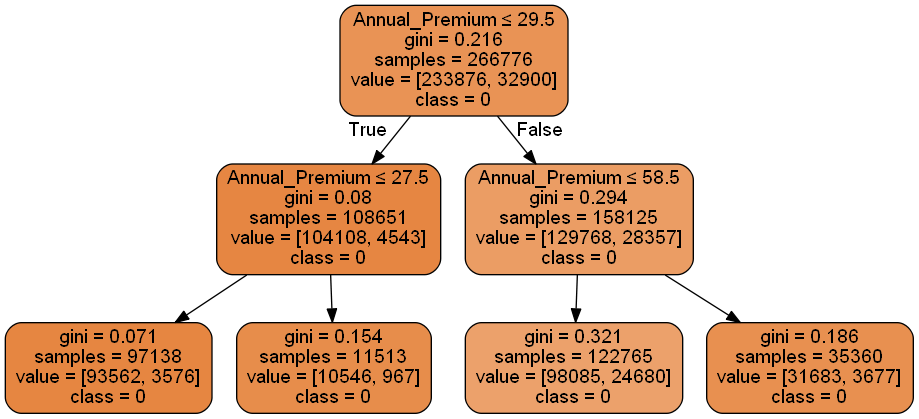

In [66]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names=['Annual_Premium'],class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Annual_Premium.png')
Image(graph.create_png())

In [105]:
data.loc[(data['Annual_Premium']>=2630.0) & (data['Annual_Premium']<9816.0),'Annual_Premium_label']='Low_premium'
data.loc[(data['Annual_Premium']>=9816.0) & (data['Annual_Premium']<38085.0),'Annual_Premium_label']='Average_premium'
data.loc[(data['Annual_Premium']>=38085.0) & (data['Annual_Premium']<46170.0),'Annual_Premium_label']='Above_avg_premium'
data.loc[(data['Annual_Premium']>=46170.0) & (data['Annual_Premium']<=540165.0),'Annual_Premium_label']='High_premium'


data.loc[(data['Annual_Premium']>=2630.0) & (data['Annual_Premium']<9816.0),'Annual_Premium']=0
data.loc[(data['Annual_Premium']>=9816.0) & (data['Annual_Premium']<38085.0),'Annual_Premium']=1
data.loc[(data['Annual_Premium']>=38085.0) & (data['Annual_Premium']<46170.0),'Annual_Premium']=2
data.loc[(data['Annual_Premium']>=46170.0) & (data['Annual_Premium']<=540165.0),'Annual_Premium']=3

In [106]:
score_ls = []     # here I will store the roc auc
score_std_ls = [] # here I will store the standard deviation of the roc_auc
for tree_depth in [1,2,3,4]:
    tree_model = DecisionTreeClassifier(max_depth=tree_depth)
    
    scores = cross_val_score(tree_model, x_train.Annual_Premium.to_frame(),       
    y_train, cv=3, scoring='roc_auc')   
    
    score_ls.append(np.mean(scores))
    
    score_std_ls.append(np.std(scores))
    
temp = pd.concat([pd.Series([1,2,3,4]), pd.Series(score_ls), pd.Series(score_std_ls)], axis=1)
temp.columns = ['depth', 'roc_auc_mean', 'roc_auc_std']
print(temp)

   depth  roc_auc_mean  roc_auc_std
0      1      0.529599     0.000910
1      2      0.540527     0.000477
2      3      0.547035     0.001000
3      4      0.547878     0.001473


We can see that there is not much difference in roc_auc score we we will use depth=2.

In [107]:
data.head()

,id,Gender,Age,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,source,Age_label,Annual_Premium_label
0,1,0,2,28.0,0,2,0,2.0,26.0,217,1.0,train,Middle Age,Above_avg_premium
1,2,0,3,3.0,0,0,1,1.0,26.0,183,0.0,train,Old Age,Average_premium
2,3,0,2,28.0,0,2,0,2.0,26.0,27,1.0,train,Middle Age,Above_avg_premium
3,4,0,0,11.0,1,1,1,1.0,152.0,203,0.0,train,Teenagers,Average_premium
4,5,1,2,41.0,1,1,1,1.0,152.0,39,0.0,train,Middle Age,Average_premium


In [108]:
data=pd.get_dummies(data,columns=['Vehicle_Age','Age','Annual_Premium'],drop_first=True)

In [109]:
data.head()

,id,Gender,Region_Code,Previously_Insured,Vehicle_Damage,Policy_Sales_Channel,Vintage,Response,source,Age_label,Annual_Premium_label,Vehicle_Age_1,Vehicle_Age_2,Age_1,Age_2,Age_3,Annual_Premium_1.0,Annual_Premium_2.0,Annual_Premium_3.0
0,1,0,28.0,0,0,26.0,217,1.0,train,Middle Age,Above_avg_premium,0,1,0,1,0,0,1,0
1,2,0,3.0,0,1,26.0,183,0.0,train,Old Age,Average_premium,0,0,0,0,1,1,0,0
2,3,0,28.0,0,0,26.0,27,1.0,train,Middle Age,Above_avg_premium,0,1,0,1,0,0,1,0
3,4,0,11.0,1,1,152.0,203,0.0,train,Teenagers,Average_premium,1,0,0,0,0,1,0,0
4,5,1,41.0,1,1,152.0,39,0.0,train,Middle Age,Average_premium,1,0,0,1,0,1,0,0


### Model Building

- In this stage we will create our model using ML libraries.
- We have also used Cross Validation to select across diffrent models.

In [42]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [110]:
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']

train.drop(['source','id','Age_label','Annual_Premium_label'],axis=1,inplace=True)
test.drop(['source','id','Response','Age_label','Annual_Premium_label'],axis=1,inplace=True)

C:\Users\Dishaa\Anaconda3\lib\site-packages\pandas\core\frame.py:4315: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [111]:
train.shape,test.shape

((381109, 15), (127037, 14))

In [112]:
# train.head()

In [113]:
# test.head()

In [114]:
X=train.drop(['Response'],axis=1)
y=train['Response'].astype('int')

# test.drop(['Response'],axis=1,inplace=True) ## For Final Prediction

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.30 ,random_state = 5)

In [115]:
## Check for Multicollinearity

# from statsmodels.stats.outliers_influence import variance_inflation_factor

# vif_data = pd.DataFrame()
# vif_data["feature"] = X.columns
  
# # calculating VIF for each feature
# vif_data["VIF"] = [variance_inflation_factor(X.values, i)
#                           for i in range(len(X.columns))]
  
# print(vif_data)

In [ ]:
# sc=StandardScaler()

# x_train_sc=sc.fit_transform(x_train)
# x_test_sc=sc.fit_transform(x_test)

### Baseline Model

In [116]:
# lr=LogisticRegression(solver="liblinear", random_state=0).fit(X, y)

# lr.fit(x_train,y_train)

lr=LogisticRegression(solver="liblinear", random_state=0)

lr.fit(x_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.837


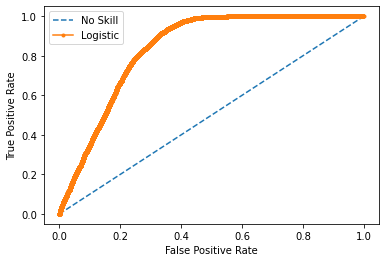

In [117]:
## Before Balancing

ns_probs = [0 for _ in range(len(y_test))]

lr_probs = lr.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot

plt.show()


##### We can see that with using simplest Classification Algorithm we are able to get ROC-AUC score as 0.83.

We can see that its is a case of Imbalanced dataset. So we will apply some techniques.

In [118]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
X_balanced, y_balanced = smote.fit_resample(X, y)

X_train_balanced,X_test_balanced,y_train_balanced,y_test_balanced=train_test_split(X_balanced,y_balanced,test_size=0.3,random_state=5)

C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\Dishaa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


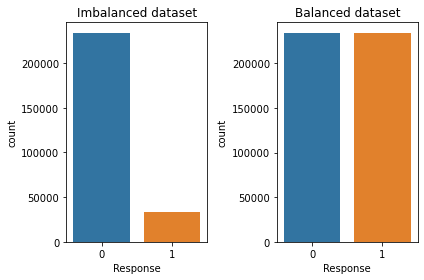

In [119]:
plt.subplot(121)
sns.countplot(y_train)
plt.title('Imbalanced dataset')

plt.subplot(122)
sns.countplot(y_train_balanced)
plt.title('Balanced dataset')

plt.savefig('Model_build_1.png')
plt.tight_layout()
plt.show()

In [121]:
lr_balanced=LogisticRegression(solver="liblinear", random_state=0)

lr_balanced.fit(X_train_balanced,y_train_balanced)

LogisticRegression(random_state=0, solver='liblinear')

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.895


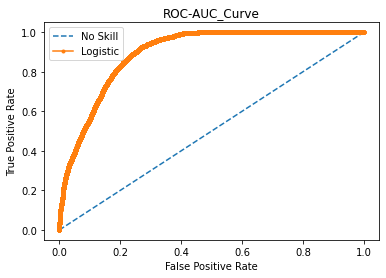

In [122]:
## After Balancing
ns_probs = [0 for _ in range(len(y_test_balanced))]


lr_probs = lr_balanced.predict_proba(X_test_balanced)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test_balanced, ns_probs)
lr_auc = roc_auc_score(y_test_balanced, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_balanced, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test_balanced, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot

plt.title('ROC-AUC_Curve')

plt.show()

We can clearly see that after Balancing the ratio of target variable . Our ROC-AUC score has increased to from **0.83 to 0.89**.

### Testing across various models.

In [123]:
models=[]

models.append(('LogisticRegression',LogisticRegression(solver="liblinear", random_state=5)))
models.append(('DecisionTree',DecisionTreeClassifier(random_state=5)))
models.append(('RandomForest',RandomForestClassifier(random_state=5)))
# models.append(('svm',SVC(random_state=5)))
models.append(('knn',KNeighborsClassifier()))

In [125]:
results=[]
names=[]

for name,model in models:
    
    kf=KFold(n_splits=5,shuffle=True,random_state=5)
    cv_score=cross_val_score(model,X_balanced,y_balanced,cv=kf,scoring='roc_auc',verbose=1)
    results.append(cv_score)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
    print(msg)
    
    
# results=[]
# names=[]

# for name,model in models:
    
#     kf=KFold(n_splits=5,shuffle=True,random_state=5)
#     cv_score=cross_val_score(model,X,y,cv=kf,scoring='roc_auc')
#     results.append(cv_score)
#     names.append(name)
#     msg = "%s: %f (%f)" % (name, cv_score.mean(), cv_score.std())
#     print(msg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.3min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


LogisticRegression: 0.894814 (0.000570)


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   53.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


DecisionTree: 0.897626 (0.000485)


KeyboardInterrupt: 

In [ ]:
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.savefig('model_comparison.png')
plt.show()

In [ ]:
for name,model in models:
#     model = m['model'] # select the model
    model.fit(x_train, y_train) # train the model
    y_pred=model.predict(x_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(x_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc =roc_auc_score(y_test,model.predict(x_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()   # Display

We can see that RandomForest has performed the best so we will go with it.

In [126]:
rtree=RandomForestClassifier(random_state=5)

rtree.fit(X_train_balanced,y_train_balanced)

RandomForestClassifier(random_state=5)

In [127]:
y_pred=rtree.predict(X_test_balanced)
print('ROC-AUC score for Random Forest: ',roc_auc_score(y_test_balanced,y_pred))

ROC-AUC score for Random Forest:  0.8855377866769316


No Skill: ROC AUC=0.500
Test Score: ROC AUC=0.948
Train Score: ROC AUC=0.990


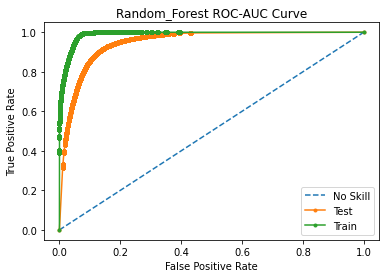

In [128]:
ns_probs = [0 for _ in range(len(y_test_balanced))]

## Tst
lr_probs_test = rtree.predict_proba(X_test_balanced)
# keep probabilities for the positive outcome only
lr_probs_test = lr_probs_test[:, 1]

## Train
lr_probs_train = rtree.predict_proba(X_train_balanced)
# keep probabilities for the positive outcome only
lr_probs_train = lr_probs_train[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test_balanced, ns_probs)
lr_auc_test = roc_auc_score(y_test_balanced, lr_probs_test)
lr_auc_train = roc_auc_score(y_train_balanced, lr_probs_train)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Test Score: ROC AUC=%.3f' % (lr_auc_test))
print('Train Score: ROC AUC=%.3f' % (lr_auc_train))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_balanced, ns_probs)
lr_fpr_test, lr_tpr_test, _ = roc_curve(y_test_balanced, lr_probs_test)
lr_fpr_train, lr_tpr_train, _ = roc_curve(y_train_balanced, lr_probs_train)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr_test, lr_tpr_test, marker='.', label='Test')
plt.plot(lr_fpr_train, lr_tpr_train, marker='.', label='Train')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('Random_Forest ROC-AUC Curve')
plt.savefig('Random_Forest ROC-AUC Curve.png')
plt.show()

In [138]:
xgb=XGBClassifier(random_state=5,max_depth=5)
xgb.fit(X_train_balanced,y_train_balanced)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=5,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

No Skill: ROC AUC=0.500
Test Score: ROC AUC=0.948
Train Score: ROC AUC=0.944


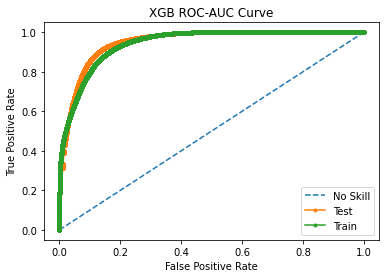

In [140]:
ns_probs = [0 for _ in range(len(y_test_balanced))]

## Tst
lr_probs_test = rtree.predict_proba(X_test_balanced)
# keep probabilities for the positive outcome only
lr_probs_test = lr_probs_test[:, 1]

## Train
lr_probs_train = xgb.predict_proba(X_train_balanced)
# keep probabilities for the positive outcome only
lr_probs_train = lr_probs_train[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test_balanced, ns_probs)
lr_auc_test = roc_auc_score(y_test_balanced, lr_probs_test)
lr_auc_train = roc_auc_score(y_train_balanced, lr_probs_train)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Test Score: ROC AUC=%.3f' % (lr_auc_test))
print('Train Score: ROC AUC=%.3f' % (lr_auc_train))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test_balanced, ns_probs)
lr_fpr_test, lr_tpr_test, _ = roc_curve(y_test_balanced, lr_probs_test)
lr_fpr_train, lr_tpr_train, _ = roc_curve(y_train_balanced, lr_probs_train)

# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr_test, lr_tpr_test, marker='.', label='Test')
plt.plot(lr_fpr_train, lr_tpr_train, marker='.', label='Train')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.title('XGB ROC-AUC Curve')
plt.savefig('xgb ROC-AUC Curve.png')
plt.show()

In [139]:
y_pred=xgb.predict(X_test_balanced)
print('ROC-AUC score for XGB: ',roc_auc_score(y_test_balanced,y_pred))

ROC-AUC score for XGB:  0.8646779633840344


### Making final prediction

In [141]:
predsTest = xgb.predict(test)
predsTest

array([0, 1, 1, ..., 0, 0, 0])

In [142]:
submission = pd.DataFrame({
        "id": test_org['id'],
        "Response":predsTest
    })
submission.to_csv('XGB_submission.csv', index=False)